# **Telco Customer Churn - Artifical Intelligence Neural Network**
## **Dataset:** [Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/telco-customer-churn.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the dataset
dataframe = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Print the first 5 rows of the dataset
print(dataframe.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# **Check the dtypes of all the cols**

In [ ]:
# Check the datatypes of the columns
print(dataframe.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# **Change the dtype of `TotalCharges` col to float64**

In [ ]:
dataframe['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
# Convert `TotalCharges` col to float
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'], errors='coerce')

In [ ]:
dataframe['TotalCharges'].values # Converted to float

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

# **Check Missing values and Duplicates**

In [ ]:
print(dataframe.isnull().sum()) # Check for missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# 11 missing values in `TotalCharges` col
dataframe = dataframe.dropna(subset=['TotalCharges'])

In [ ]:
print(dataframe.isnull().sum()) # No missing values are present now

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Checking for duplicates
print(dataframe.duplicated().sum())

0


#Exploratory Data Analysis (EDA)

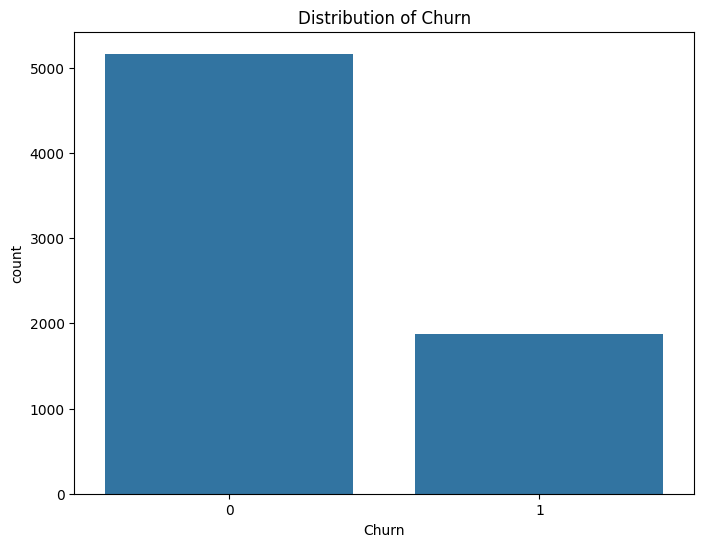

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=dataframe)
plt.title('Distribution of Churn')
plt.show()

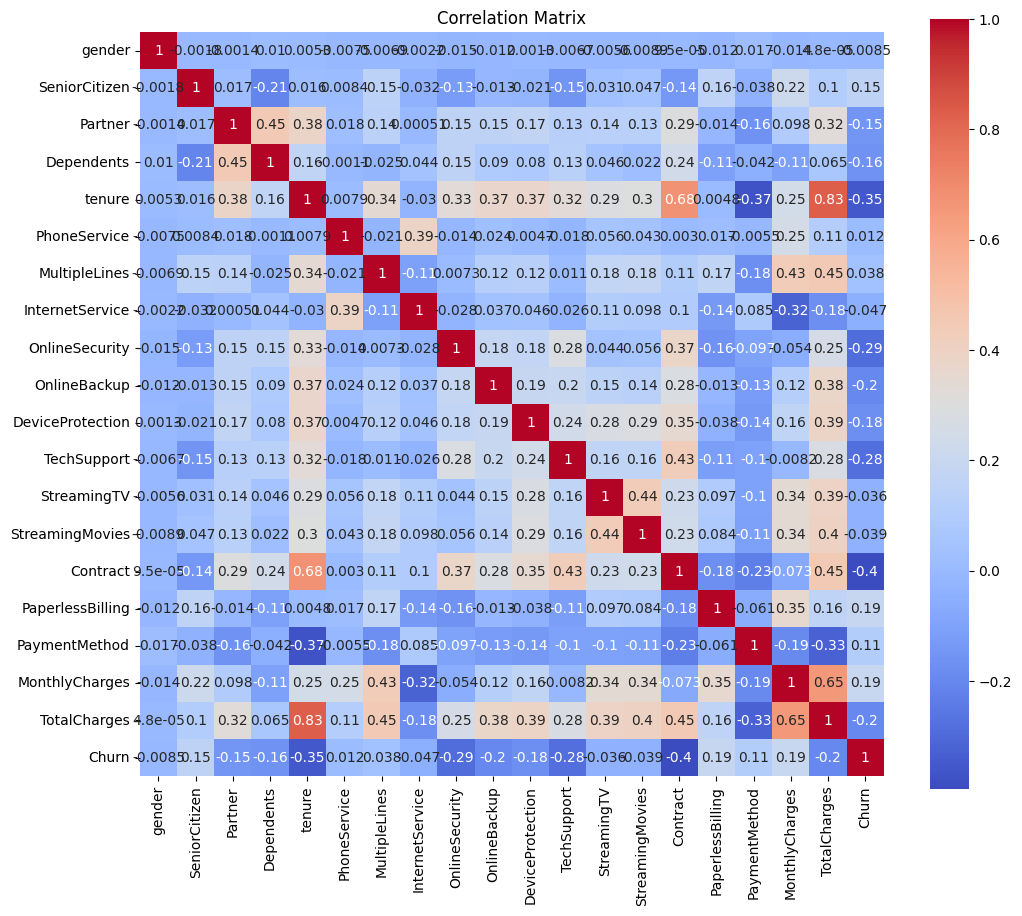

In [ ]:
# Drop non-numerical columns before calculating correlations
numerical_dataframe = dataframe.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numerical_dataframe.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# **Encode the categorical values**

In [ ]:
label_encoder = LabelEncoder()
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

# **Scale the numerical features**

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

dataframe[numerical_features] = scaler.fit_transform(dataframe[numerical_features])

# **Creating an artificial neural network (ANN) Model**

In [ ]:
# Split the data into features and target
X = dataframe.drop('Churn', axis=1)
y = dataframe['Churn']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object
customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contra

In [ ]:
X_train.drop(columns=['customerID'], inplace=True)
X_test.drop(columns=['customerID'], inplace=True)

In [ ]:
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_train: 19
Number of features in X_test: 19


In [ ]:
# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)) # Train the model

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.4639 - accuracy: 0.7657 - val_loss: 0.4475 - val_accuracy: 0.7839
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8021 - val_loss: 0.4399 - val_accuracy: 0.7875
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8041 - val_loss: 0.4372 - val_accuracy: 0.7825
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8043 - val_loss: 0.4431 - val_accuracy: 0.7797
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8053 - val_loss: 0.4409 - val_accuracy: 0.7832
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8082 - val_loss: 0.4391 - val_accuracy: 0.7839
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8089 - val_loss: 0.4409 - val_accuracy: 0.7896